In [2]:
import os
import json
from Agent.utils import *
from Agent.data_agent import SalesDataAgent

agent = SalesDataAgent(
    provider="openai",
    model="gpt-4o-mini",
    temperature=0.1,
    max_tokens=16384,
    enable_tracing=True,
    phoenix_endpoint="http://localhost:6006/v1/traces",
    streaming=True,
)

OpenTelemetry Tracing Details
|  Phoenix Project: evaluating-agent
|  Span Processor: SimpleSpanProcessor
|  Collector Endpoint: http://localhost:6006/v1/traces
|  Transport: HTTP + protobuf
|  Transport Headers: {}
|  
|  Using a default SpanProcessor. `add_span_processor` will overwrite this default.
|  
|  WARNING: It is strongly advised to use a BatchSpanProcessor in production environments.
|  
|  `register` has set this TracerProvider as the global OpenTelemetry default.
|  To disable this behavior, call `register` with `set_global_tracer_provider=False`.



In [ ]:
result = agent.run(
    "Show me the sales in Nov 1st 2021",
    visualization_goal="Sales trend for Nov 1st 2021",
    best_of_n = 3
)

[Agent] Running best-of-1 with temperatures: [0.1]
Checking the model can run locally
OpenAI API is accessible
Running the graph...
[LangGraph] Starting LangGraph execution with tracing
Tool selected: lookup_sales_data
Generated SQL Query:
 SELECT * FROM sales WHERE CAST(Sold_Date AS VARCHAR) LIKE '%2021-11-01%';
Tool selected: analyzing_data


KeyboardInterrupt: 

In [13]:
print(type(result))
print(result)
# DV: the output shows that result is a tuple, because it is the return of data_agent.run_with_evaluation, that actually is (best_result, score_variance)

<class 'tuple'>
({'prompt': 'Show me the sales in Nov 1st 2021', 'data': '     Store_Number  SKU_Coded  Product_Class_Code  Sold_Date  Qty_Sold  Total_Sale_Value  On_Promo\n0            1980    6172850               22875 2021-11-01         1         19.990000         0\n1            1210    6173050               22875 2021-11-01         1          4.990000         0\n2            1320    6173050               22875 2021-11-01         1          4.990000         0\n3            2640    6173050               22875 2021-11-01         1          4.990000         0\n4             880    6173100               22975 2021-11-01         1         14.990000         0\n5            2640    6173350               22800 2021-11-01         2         17.580000         0\n6            1980    6173350               22800 2021-11-01         1          8.790000         0\n7            2200    6173350               22800 2021-11-01         1          8.790000         0\n8            1650    6173350       

In [6]:
# DV: we are interested in best_result, that is the first element of the tuple
print("Final tool:", result[0].get("tool_choice"))
print("Chart config:", result[0].get("chart_config"))
print("Answer steps:", len(result[0].get("answer", [])))

Final tool: end
Chart config: {'chart_type': 'line', 'x_axis': 'Sold_Date', 'y_axis': 'Total_Sale_Value', 'title': 'Sales Trend for Nov 1st 2021', 'data': '     Store_Number  SKU_Coded  Product_Class_Code  Sold_Date  Qty_Sold  Total_Sale_Value  On_Promo\n0            1980    6172850               22875 2021-11-01         1         19.990000         0\n1            1210    6173050               22875 2021-11-01         1          4.990000         0\n2            1320    6173050               22875 2021-11-01         1          4.990000         0\n3            2640    6173050               22875 2021-11-01         1          4.990000         0\n4             880    6173100               22975 2021-11-01         1         14.990000         0\n5            2640    6173350               22800 2021-11-01         2         17.580000         0\n6            1980    6173350               22800 2021-11-01         1          8.790000         0\n7            2200    6173350               22800 202

In [7]:
print("=== LAST ANSWER ===")
print(result[0]["answer"][-1])
print("===================")

=== LAST ANSWER ===
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

data = '''     Store_Number  SKU_Coded  Product_Class_Code  Sold_Date  Qty_Sold  Total_Sale_Value  On_Promo
0            1980    6172850               22875 2021-11-01         1         19.990000         0
1            1210    6173050               22875 2021-11-01         1          4.990000         0
2            1320    6173050               22875 2021-11-01         1          4.990000         0
3            2640    6173050               22875 2021-11-01         1          4.990000         0
4             880    6173100               22975 2021-11-01         1         14.990000         0
5            2640    6173350               22800 2021-11-01         2         17.580000         0
6            1980    6173350               22800 2021-11-01         1          8.790000         0
7            2200    6173350               22800 2021-11-01         1          8.790000         0
8          

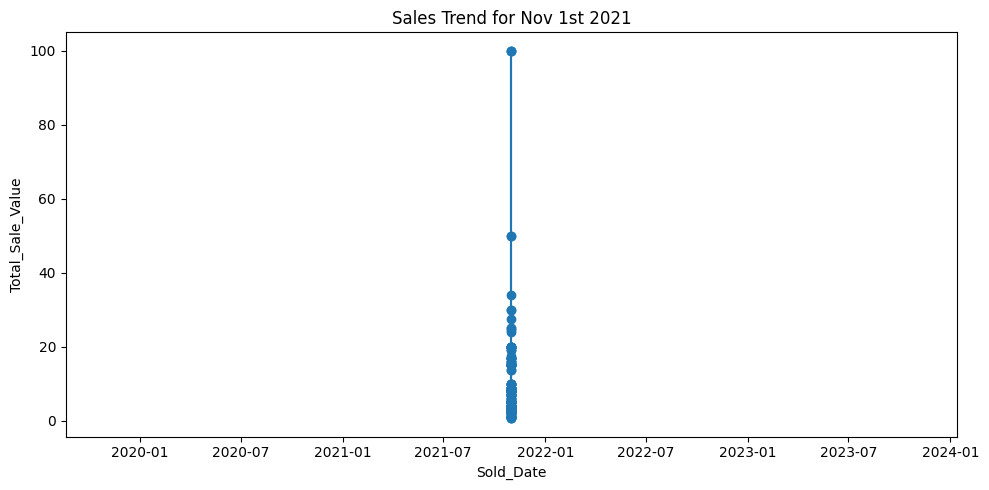

In [14]:
# If the last answer is chart code, execute it to render the chart
if result[0].get("chart_config") and result[0].get("answer"):
    exec(result[0]["answer"][-1], globals(), locals())
